# Detecting nozzle positions

## Initialization

In [133]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

[autoreload of background failed: Traceback (most recent call last):
  File "C:\Users\lmf1\Miniconda3\lib\site-packages\IPython\extensions\autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\lmf1\Miniconda3\lib\site-packages\IPython\extensions\autoreload.py", line 471, in superreload
    module = reload(module)
  File "C:\Users\lmf1\Miniconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\lmf1\Documents\GitHub\embedded3DPvids\py\vid\background.py", line 168
    def fitBackground(self, y0:) -> None:
                               ^
Synt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
# global packages
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# local packages
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
from py.im.imshow import imshow
import py.vid.noz_detect as nt
import py.file.file_handling as fh
import py.im.morph as vm

# logging
LOGGERDEFINED = logs.openLog('nozzle_detect.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# export all nozzles

In [132]:
folders = [os.path.join(cfg.path.server, r'SDT\SO', f'I_SO{v}_S_{w}', f'I_SO{v}_S_{w}_{d}') for v,d in {9:230721, 10:230725, 11:230727}.items() for w in ['3.00', '3.50', '4.00']]
nloop = nt.exportNozDimsRecursive(folders, overwrite=True, diag=0, modes=[1])
nloop.run()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230721\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_nozDims_I_SO9_S_3.00_230721_121526_5.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230721\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_background_I_SO9_S_3.00_230721_121526_5.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230721\disturbHoriz3_1_0.625\disturbHoriz3_1_0.625_nozDims_I_SO9_S_3.00_230721_121649_4.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230721\disturbHoriz3_1_0.625\disturbHoriz3_1_0.625_background_I_SO9_S_3.00_230721_121649_4.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230721\disturbHoriz3_1_0.750\disturbHoriz3_1_0.750_nozDims_I_SO9_S_3.00_230721_12

[]

In [131]:
nloop.openErrorFolder(0)

In [129]:
nloop.folderErrorList

[{'folder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\SO\\I_SO9_S_3.50\\I_SO9_S_3.50_230721\\disturbHoriz3_1_1.250',
  'error': TypeError("'int' object is not subscriptable")}]

{'folder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\SO\\I_SO9_S_3.50\\I_SO9_S_3.50_230721\\disturbHoriz3_1_1.250', 'error': TypeError("'int' object is not subscriptable")}
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO9_S_3.50\I_SO9_S_3.50_230721\disturbHoriz3_1_1.250\disturbHoriz3_1_1.250_nozDims_I_SO9_S_3.50_230721_180400_4.csv
INFO: Frame not collected at time 42.189730971097894: (t,frame) = (0.0, 1049.0)


TypeError: 'int' object is not subscriptable

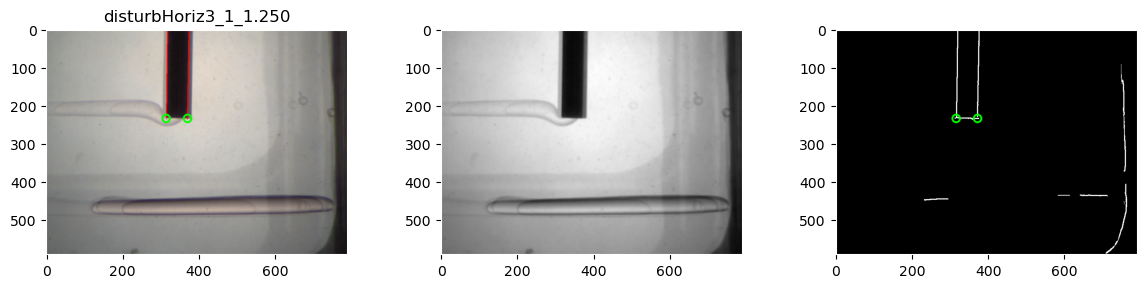

In [130]:
nloop.testFolderError(0, overwrite=True, diag=1, useStills=True, modes=[1])

In [ ]:
nloop = nt.exportNozDimsRecursive([os.path.join(cfg.path.server, r'SDT', s) for s in ['SO_S20-0.5', 'SO_S85-0.05']]
                                      , overwrite=False, diag=0)

In [ ]:
nloop.exportErrors(os.path.join(cfg.path.fig, 'SDT', 'errors', 'nozErrors.csv'))

In [127]:
len(nloop.folderErrorList)

154

In [ ]:
folder = nloop.folderErrorList[8]['folder']
nt.exportNozDims(folder, diag=2, overwrite=True)

In [ ]:
fh.openExplorer(folder)

# fix backgrounds

In [ ]:
df = nt.findBadBackgrounds(os.path.join(cfg.path.server, 'SDT'), os.path.join(cfg.path.fig, 'SDT', 'errors'))

In [ ]:
len(df)

In [ ]:
df

In [ ]:
for i in [1000]:
    print(i)
    nt.fixBackground(df.loc[i, 'folder'], diag=1)

In [ ]:
nt.fixBackground(os.path.join(cfg.path.server, r'SDT\SO\I_SO10_S_3.50\I_SO10_S_3.50_230208\disturbHoriz3_1_1.250'), diag=1)

# detect one nozzle

In [ ]:
fh.openExplorer(folder)

In [112]:
import cv2 as cv

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230721\disturbHoriz3_1_1.250\disturbHoriz3_1_1.250_nozDims_I_SO9_S_3.00_230721_121055_5.csv


{'xL': 339, 'xR': 414, 'yB': 271}

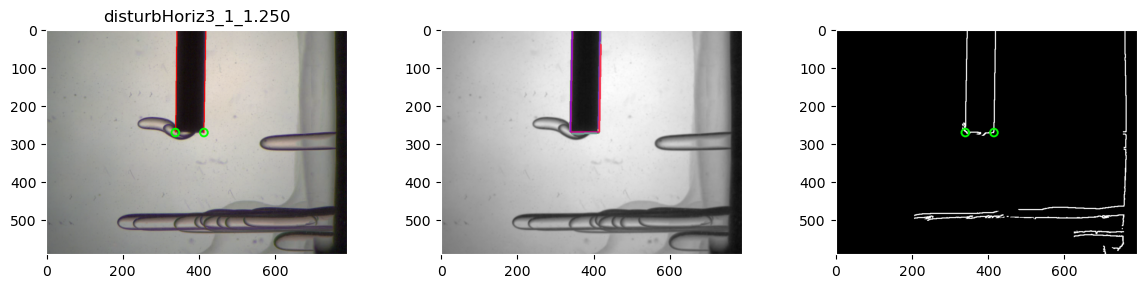

In [10]:
folder = os.path.join(cfg.path.server, r'SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230721\disturbHoriz3_1_1.250')
nv = nt.nozData(folder)
nv.detectNozzle(diag=2, overwrite=True, export=True, useStills=False)
nv.nozDims()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO11_S_4.00\I_SO11_S_4.00_230727\disturbHoriz3_3_1.250\disturbHoriz3_3_1.250_background_I_SO11_S_4.00_230727_142620_7.png


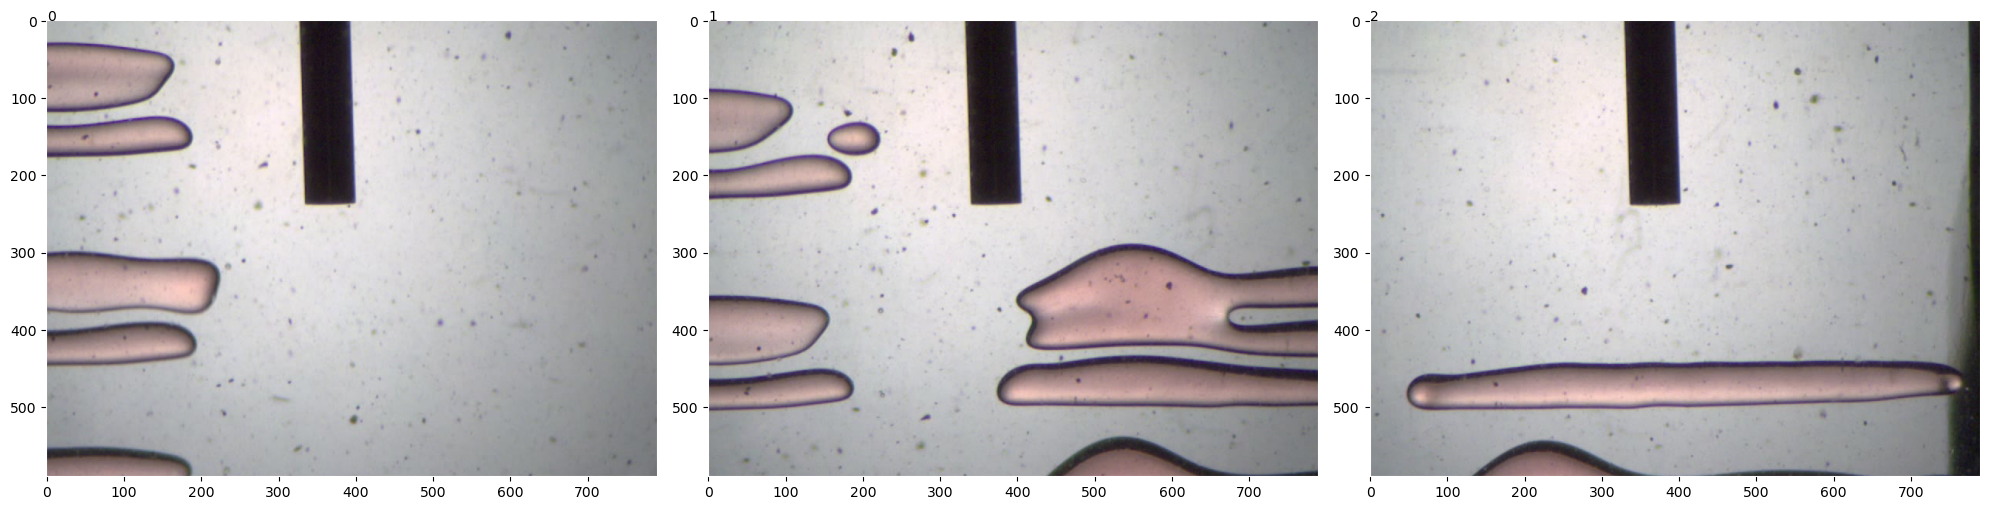

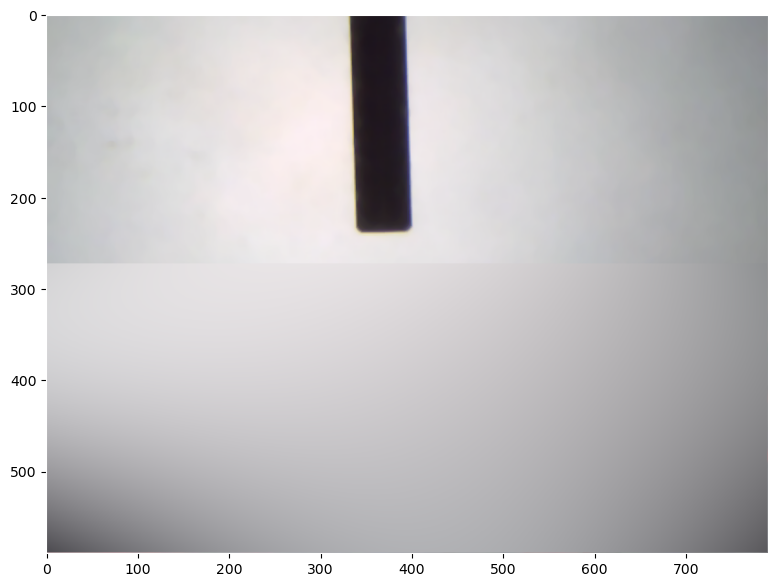

In [168]:
folder = os.path.join(cfg.path.server,r'SDT\SO\I_SO11_S_4.00\I_SO11_S_4.00_230727\disturbHoriz3_3_1.250')
nv = nt.nozData(folder, bgmode=2)
nv.exportBackground(diag=2, overwrite=True, numpics=3, zmin=-25)

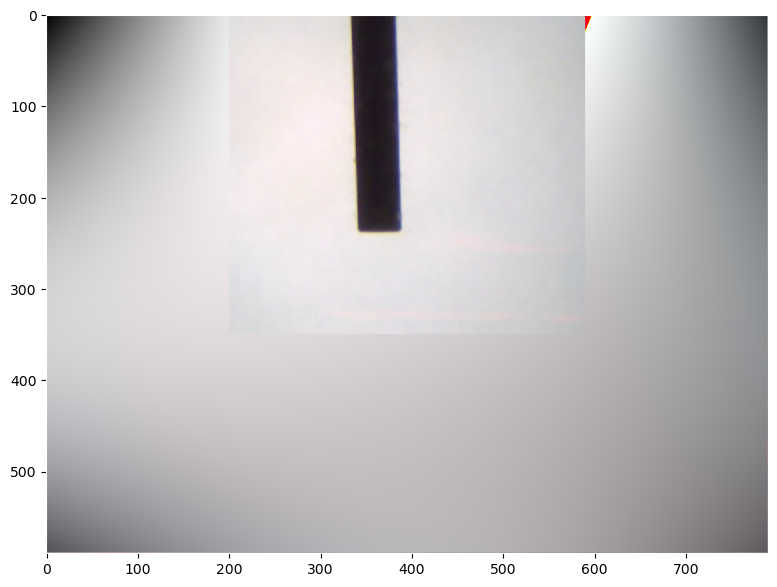

In [163]:
nv.bg.fitBackground()

In [ ]:
run ../../tests/test_nozDetect